# **BEM LUNOS**
---
**Ordem do Café Sagrado**- "Sem cafeína não há vitória".
---
**Integrantes:** Gisela Ceresér Kassick, Giovani M. Nagano e Rebeka L. Batichotti  
**Instituição:** Ilum – Escola de Ciência – CNPEM  
**Disciplina:** Prática em Ciência de Dados  
**Professores orientadores:** Daniel R. Cassar 

---
## **INTRODUÇÃO**

A previsão do desempenho acadêmico tem se tornado uma área de crescente interesse no campo da educação e ciência de dados, com implicações significativas para o desenvolvimento de estratégias educacionais personalizadas e intervenções pedagógicas oportunas. Este projeto aborda a análise preditiva do desempenho de estudantes utilizando técnicas avançadas de machine learning, com foco na identificação dos fatores mais influentes que impactam os resultados acadêmicos.

O dataset "Student Performance Factors" fornece uma base rica e multidimensional para esta investigação, contendo informações sobre 19 atributos distintos que abrangem desde características demográficas e socioeconômicas até hábitos de estudo, envolvimento parental e recursos educacionais. A complexidade e multidimensionalidade deste conjunto de dados oferecem uma oportunidade única para explorar como diferentes algoritmos de regressão capturam e priorizam essas relações.

Através de uma abordagem sistemática que inclui pré-processamento rigoroso, seleção de atributos, otimização de hiperparâmetros e validação cruzada, este trabalho busca não apenas desenvolver modelos preditivos precisos, mas também compreender as dinâmicas subjacentes que governam o desempenho acadêmico. A aplicação de técnicas de interpretabilidade como SHAP permite investigar os modelos, oferecendo insights acionáveis para educadores e gestores.

---
## **DESENVOLVIMENTO**

---
### **DOWNLOAD DO DATASET**

Para iniciar nossa análise, utilizaremos o dataset "Student Performance Factors" disponível no Kaggle. Realizamos o download do conjunto de dados através do link  https://teams.microsoft.com/l/message/19:e98de34e8e034b56b694d6cdac057368@thread.v2/1760965275974?context=%7B%22contextType%22%3A%22chat%22%7D e extraímos o arquivo compactado em formato ZIP. O arquivo resultante, em formato CSV, foi armazenado no diretório da Quest 4 do projeto no Jupyter Notebook. Agora, procederemos com a leitura e carregamento dos dados para dar início ao processo de exploração e modelagem

In [51]:
import pandas as pd

df = pd.read_csv('StudentPerformanceFactors.csv')
print(df)

      Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0                23          84                  Low                High   
1                19          64                  Low              Medium   
2                24          98               Medium              Medium   
3                29          89                  Low              Medium   
4                19          92               Medium              Medium   
...             ...         ...                  ...                 ...   
6602             25          69                 High              Medium   
6603             23          76                 High              Medium   
6604             20          90               Medium                 Low   
6605             10          86                 High                High   
6606             15          67               Medium                 Low   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
0                     

---
### **TRATAMENTO DE DADOS**

No tratamento de dados, será realizado três passos:
1. Retirar linhas que não tenham algum valor, para evitar erros no treinamento;
2. Converter os dados categóricos (ordinais e binários) para numéricos, já que nosso target é numérico e usaremos regressão para o treinamento;
3. Dividir os dados entre treino e teste para aplicar no modelo.
   
Vamos começar com o primeiro tópico:

In [52]:
import seaborn as sns #para carregar datasets prontos;
import pandas #para manipulação de dados;
from sklearn.preprocessing import OrdinalEncoder, StandardScaler #para conversão de dados categóricos;

df = df.dropna()

# Drop de colunas com QUALQUER linha NaN
df = df.dropna(axis=1)

#### **CONVERSÃO DE DADOS CATEGÓRICOS PARA NUMÉRICOS**

Abaixo segue o código que irá converter dados categóricos ordinais com o OrdinalEncoder, atribuindo valores numéricos correspondentes à ordem de cada categoria, e dados binários a partir de "mapping" cada label com 0 ou 1.

In [53]:
categoricos = {
    'Parental_Involvement': ['Low', 'Medium', 'High'],
    'Access_to_Resources': ['Low', 'Medium', 'High'],
    'Motivation_Level': ['Low', 'Medium', 'High'],
    'Family_Income': ['Low', 'Medium', 'High'],
    'Teacher_Quality': ['Low', 'Medium', 'High'],
    'Distance_from_Home': ['Near', 'Moderate', 'Far'],
    'Peer_Influence': ['Negative', 'Neutral', 'Positive'],
    'Parental_Education_Level': ['High School', 'College', 'Postgraduate'] 
}

binarios = {
    'Gender': {'Male': 0, 'Female': 1},
    'Learning_Disabilities': {'No': 0, 'Yes': 1},
    'Extracurricular_Activities': {'No': 0, 'Yes': 1},
    'Internet_Access': {'No': 0, 'Yes': 1},
    'School_Type': {'Public': 0, 'Private': 1}
}

for coluna, ordem in categoricos.items():
    encoder = OrdinalEncoder(categories=[ordem])
    df[coluna] = encoder.fit_transform(df[[coluna]])

for coluna, mapa in binarios.items():
    df[coluna] = df[coluna].map(mapa)


#### **SPLIT E NORMALIZAÇÃO**

Nesta seção, iremos dividir nossa dataset entre treino e teste para poder criar e treinar os modelos. Além disso, vamos definir nossos atributos e o nosso target, que será o exam score. Com esses objetivos, vamos usar funções do `sklearn.model_selection`. Para a normalização, foi escolhido o `StandardScaler`.

Note que a normalização com StandardScaler é crucial para KNN, Ridge Regression e Elastic Net devido à sua sensibilidade à escala dos dados. O KNN baseia-se em cálculos de distância onde features em escalas diferentes distorceriam as medidas de similaridade. Já Ridge e Elastic Net aplicam penalidades de regularização que seriam injustamente influenciadas por variáveis com magnitude naturalmente maior, comprometendo a eficácia do modelo. O StandardScaler padroniza os dados removendo a média e escalando para variância unitária, transformando cada feature para ter média zero e desvio padrão igual a 1. Essa transformação garante que todas as features contribuam igualmente para os algoritmos, independentemente de suas escalas originais.

In [54]:
print(df.columns)

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')


In [55]:
from sklearn.model_selection import train_test_split #Para dividir entre treino e teste do modelo

FEATURES = ['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender']
#definindo o alvo que será previsto
TARGET = ['Exam_Score']
    
#definindo na variável X os valores de cada coluna que é parâmetro
X = df[FEATURES].values
    
#definindo na variável y os valores da coluna alvo e transformando em unidimensional com o método ".ravel()"
y = df[TARGET].values.ravel()

#dividindo entre teste e treino, com uma porcentagem de 20% para teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

normalizador = StandardScaler()
X_treino_norm = normalizador.fit_transform(X_treino)
X_teste_norm = normalizador.transform(X_teste)

---
### **BASELINE**

Nesta seção, estabeleceremos uma baseline de performance como referência fundamental para avaliar a eficácia dos nossos modelos de regressão. A baseline representa o desempenho mínimo que nossos algoritmos devem superar para demonstrar valor preditivo. Utilizaremos abordagens simples, prevendo constantemente a média dos valores de treino. Esta prática é crucial para validar que a complexidade adicional dos algoritmos de machine learning está de fato gerando ganhos preditivos significativos em relação a soluções triviais.

In [56]:
from sklearn.metrics import root_mean_squared_error
import numpy as np

# Calcula a média do target no treino
media = np.mean(y_treino)

# Cria previsões (sempre a média)
y_pred_baseline = np.full_like(y_teste, fill_value=media)

# Calcula RMSE
RMSE = root_mean_squared_error(y_teste, y_pred_baseline)

print(RMSE)

3.9513102465608547


---
### **CRIANDO O MODELO E TREINANDO**

Nesta seção, aplicaremos cinco algoritmos de regressão distintos - K-Nearest Neighbors (KNN), Random Forest, Elastic Net, Gradient Boosting Regressor e Ridge Regression - para treinar modelos preditivos utilizando nosso conjunto de dados. Para cada algoritmo, iniciaremos com uma fundamentação teórica que explica seus princípios de funcionamento e características principais, seguida pela implementação prática utilizando a biblioteca scikit-learn.

É importante destacar que, nesta fase inicial de modelagem, utilizaremos valores padrão de hiperparâmetros pré-determinados para cada algoritmo. Esta abordagem nos permitirá estabelecer uma linha de base de performance antes de proceder com a otimização sistemática de hiperparâmetros, que será realizada em etapas subsequentes do projeto.

Para avalisar o desempenho dos algoritmos neste primeiro momento, será usado o Root Mean Squared Error (RMSE) - uma métrica que quantifica a magnitude média dos erros de previsão. É a raiz quadrada da média dos quadrados das diferenças entre valores observados e previstos e está na mesma unidade da variável target. Por utilizar o quadrado dos erros, esta métrica penaliza mais fortemente previsões que estão significativamente distantes dos valores reais, sendo particularmente sensível a outliers.

#### **K-nearest neighbors (KNN)**

O algoritmo K-Nearest Neighbors (KNN) é um método de aprendizado baseado em instâncias que realiza previsões calculando a similaridade entre observações no espaço de features. Quando aplicado a problemas de regressão, o KNN identifica os k pontos de dados mais próximos da observação que se deseja prever, utilizando métricas de distância como Euclidiana ou Manhattan, e então calcula a média dos valores target desses vizinhos para gerar a previsão final. Esta abordagem não constrói um modelo explícito durante o treinamento, mas armazena todo o conjunto de dados, realizando os cálculos apenas no momento da inferência, o que o torna computacionalmente intensivo para conjuntos 
grandes, porém flexível para capturar padrões complexos não-lineares nos dados.

In [57]:
from sklearn.neighbors import KNeighborsRegressor #Para aplicar o modelo
from sklearn.metrics import root_mean_squared_error #Para avaliar seu desempenho
 

scaler = StandardScaler()
X_treino_scaled = scaler.fit_transform(X_treino)
X_teste_scaled = scaler.transform(X_teste)

#criando modelo
modelo_knn = KNeighborsRegressor()
modelo_knn.fit(X_treino_scaled, y_treino)
    
#treinando o modelo
y_pred_knn = modelo_knn.predict(X_teste_scaled)

#avaliando o desempenho com RMSE (que será nosso retorno) a partir do target previsto
RMSE = root_mean_squared_error(y_teste, y_pred_knn)

print(RMSE)

2.783189573246307


#### **Random Forest**

Random Forest Regression é um método de ensemble baseado em bagging (Bootstrap Aggregating) que constrói múltiplas árvores de decisão independentes e combina suas previsões através da média. O bagging é uma técnica que reduz a variância do modelo através da criação de múltiplos conjuntos de treinamento via amostragem com reposição (bootstrap) e da agregação de seus resultados. Durante o treinamento, cada árvore é construída usando uma amostra bootstrap do conjunto de dados original e, em cada divisão de nó, apenas um subconjunto aleatório de features é considerado para seleção, introduzindo dupla aleatorização que promove diversidade entre as árvores e reduz significativamente o overfitting, resultando em um modelo robusto que geralmente apresenta excelente performance com pouca necessidade de ajuste fino de hiperparâmetros e natural resistência a outliers e ruídos nos dados.

In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error

# Criando modelo
modelo_rf = RandomForestRegressor(n_estimators=100,
    max_depth=10, 
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=None)
    
# Treinando o modelo
modelo_rf.fit(X_treino, y_treino)
    
# Fazendo previsões
y_pred_rf = modelo_rf.predict(X_teste)
    
# Avaliando o desempenho com RMSE
RMSE = root_mean_squared_error(y_teste, y_pred_rf)
    
print(RMSE)

2.424535726193292


#### **Gradient Boosting Regressor**

Gradient Boosting Regression é uma técnica de ensemble sequencial que constrói um modelo preditivo forte através da combinação iterativa de múltiplos modelos fracos. O termo ensemble refere-se à abordagem que combina múltiplos modelos base para criar um predictor mais robusto e preciso do que qualquer modelo individual. O algoritmo opera ajustando sequencialmente novos modelos aos resíduos (erros) dos modelos anteriores, utilizando gradiente descendente para minimizar uma função de perda diferenciável, onde cada nova árvore é treinada para prever os gradientes negativos dos erros cometidos pelas árvores existentes, criando assim um processo de melhoria contínua que gradualmente reduz o viés do modelo enquanto mantém a variância controlada através de parâmetros como taxa de aprendizado e profundidade das árvores.

In [63]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import root_mean_squared_error

# Criando modelo
modelo_gbr = GradientBoostingRegressor(n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    subsample=1.0,
    max_features=None,
    criterion="friedman_mse",  
    min_impurity_decrease=0.,
    random_state=42)

# Treinando o modelo
modelo_gbr.fit(X_treino, y_treino)

# Fazendo previsões
y_pred_gbr = modelo_gbr.predict(X_teste)

# Avaliando o desempenho com RMSE
RMSE = root_mean_squared_error(y_teste, y_pred_gbr)

print(RMSE)

2.153422666380663


#### **Elastic Net**

Elastic Net é um algoritmo de regressão regularizada que combina as penalidades L1 (Lasso) e L2 (Ridge) em uma única função objetivo. A penalidade L1 promove esparsidade nos coeficientes, efetivamente realizando seleção de variáveis ao zerar coeficientes de features menos importantes, enquanto a penalidade L2 contrai uniformemente todos os coeficientes para lidar com multicolinearidade. Durante o treinamento, o algoritmo adiciona um termo de penalização à função de custo tradicional que é uma combinação linear das normas L1 e L2 dos coeficientes, controlada pelo parâmetro alpha para a força total da regularização e l1_ratio para o balanço entre as duas penalidades, resultando em um modelo que pode efetivamente reduzir overfitting enquanto mantém a interpretabilidade através da criação de coeficientes exatamente zero para features irrelevantes.

In [64]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler

# Criando modelo
modelo_en = ElasticNet(alpha=1.0,
    l1_ratio=0.5)

# Treinando o modelo
modelo_en.fit(X_treino_scaled, y_treino)

# Fazendo previsões
y_pred_en = modelo_en.predict(X_teste_scaled)

# Avaliando o desempenho com RMSE
RMSE = root_mean_squared_error(y_teste, y_pred_en)
    
print(RMSE)

2.9475110833146863


#### **Ridge Regression**

Ridge Regression é uma extensão da regressão linear ordinária que adiciona uma penalidade L2 (soma dos quadrados dos coeficientes) à função de custo para lidar com problemas de multicolinearidade e overfitting. A penalidade L2, também conhecida como regularização de Tikhonov, adiciona o quadrado da magnitude dos coeficientes à função de custo, efetivamente contraindo todos os coeficientes proporcionalmente sem eliminá-los completamente. Ao incorporar este termo de regularização controlado pelo parâmetro alpha, o algoritmo estabiliza as estimativas na presença de features altamente correlacionadas e melhora a generalização do modelo, mantendo toda a interpretabilidade da regressão linear tradicional enquanto oferece melhor performance preditiva em situações onde a matriz de design é mal-condicionada ou o número de features é grande relativo ao número de observações.

In [65]:
from sklearn.linear_model import Ridge
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_treino_scaled = scaler.fit_transform(X_treino)
X_teste_scaled = scaler.transform(X_teste)

# Criando modelo
modelo_rr = Ridge(
    alpha=1.0,
    solver='auto', 
    tol=0.001,
    fit_intercept=True,
    copy_X=True,          
    max_iter=None,          
    positive=False,
    random_state=42
)

# Treinando o modelo
modelo_rr.fit(X_treino_scaled, y_treino)

# Fazendo previsões
y_pred_rr = modelo_rr.predict(X_teste_scaled)

# Avaliando o desempenho com RMSE
RMSE = root_mean_squared_error(y_teste, y_pred_rr)

print(RMSE)


2.037888341089658


---
### **EXPLICAÇÃO DOS MODELOS COM SHAP E DISCUSSÃO DE RESULTADOS**

O SHAP (SHapley Additive exPlanations) é um método de interpretabilidade baseado na teoria dos jogos que oferece explicações locais para previsões individuais e análises globais para o comportamento geral do modelo. Enquanto as explicações locais atribuem a contribuição específica de cada feature para uma única previsão, o impacto global agrega essas contribuições para todo o dataset, identificando padrões dominantes e relações estruturais. Esta capacidade de transitar entre perspectivas micro e macro torna o SHAP particularmente versátil para compreender tanto casos específicos quanto tendências gerais do modelo.

O funcionamento do SHAP baseia-se no cálculo da contribuição marginal média de cada feature, considerando todas as combinações possíveis de variáveis. Para análises locais, o método calcula exatamente como cada feature influenciou uma previsão específica. Já para o impacto global, o SHAP agrega esses valores individuais através de métricas como a média dos valores absolutos (mean |SHAP value|), criando um ranking robusto de importância de features. Esta abordagem garante que tanto a frequência quanto a magnitude do impacto de cada variável sejam consideradas, revelando interações complexas e dependências contextuais no modelo como um todo.

No presente trabalho, usaremos o SHAP para analisar o comportamento geral de cada modelo neste dataset, a fim de descobrir como cada feature contribui. Para isso, vamos começar instalando o SHAP:

In [66]:
pip install shap

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\venvs\ilumpy\python.exe -m pip install --upgrade pip


Em seguida, vamos aplicar o SHAP:

  0%|          | 0/100 [00:00<?, ?it/s]

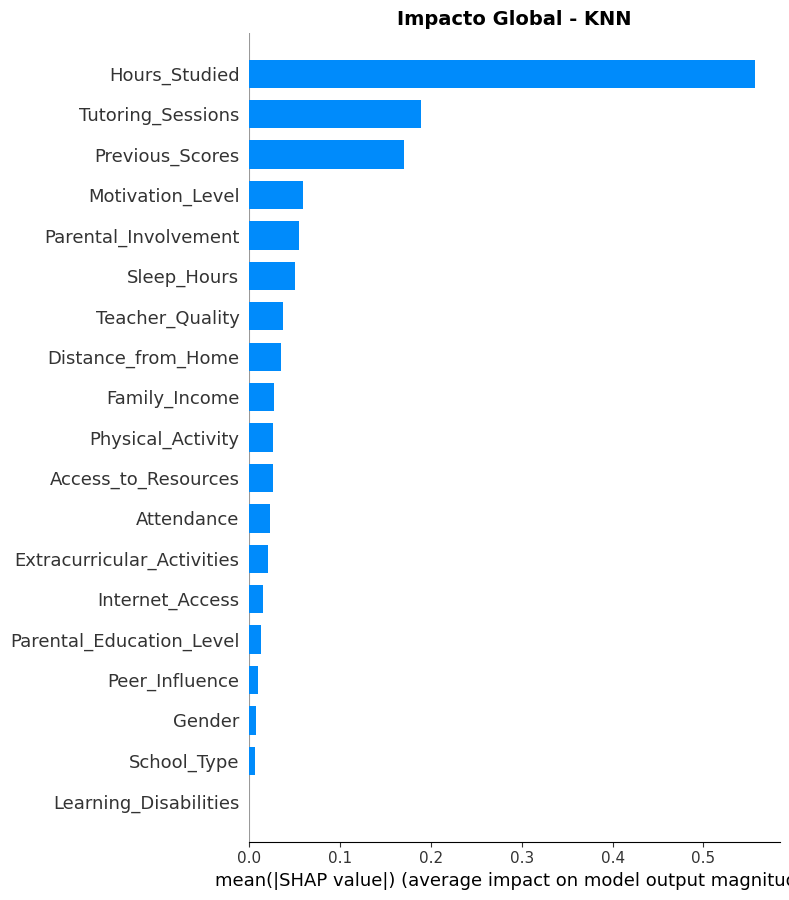

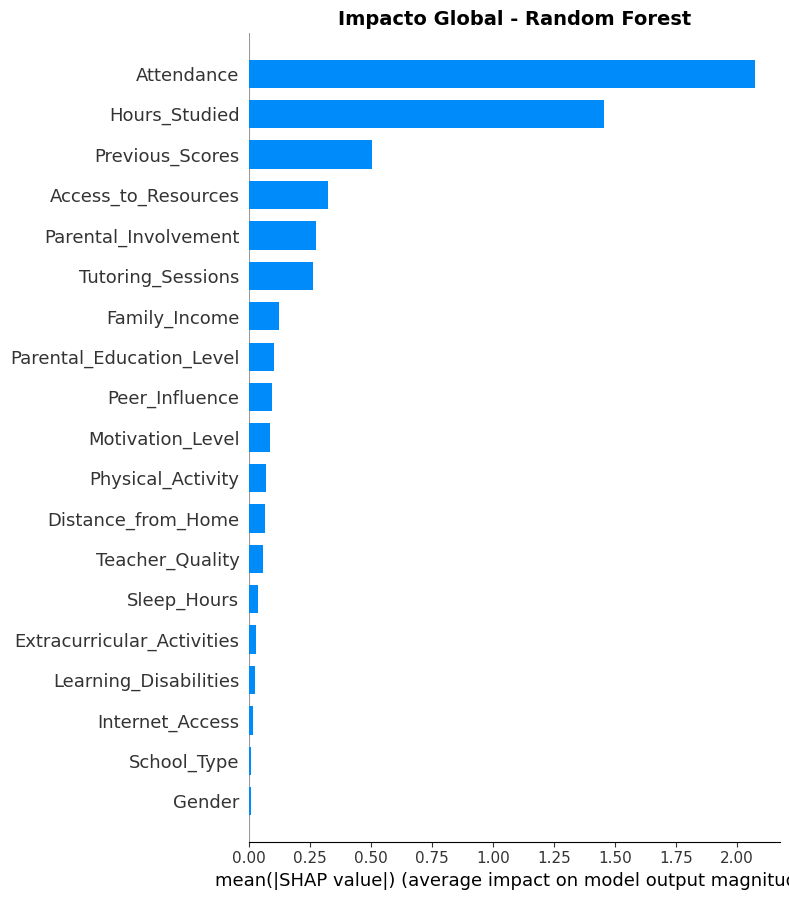

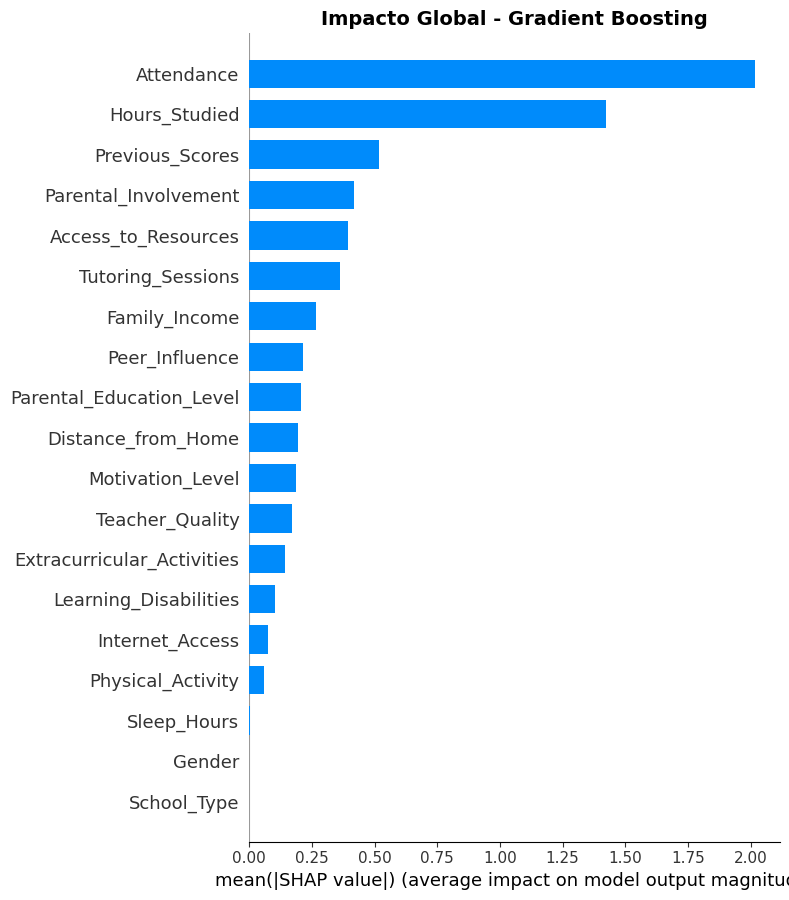

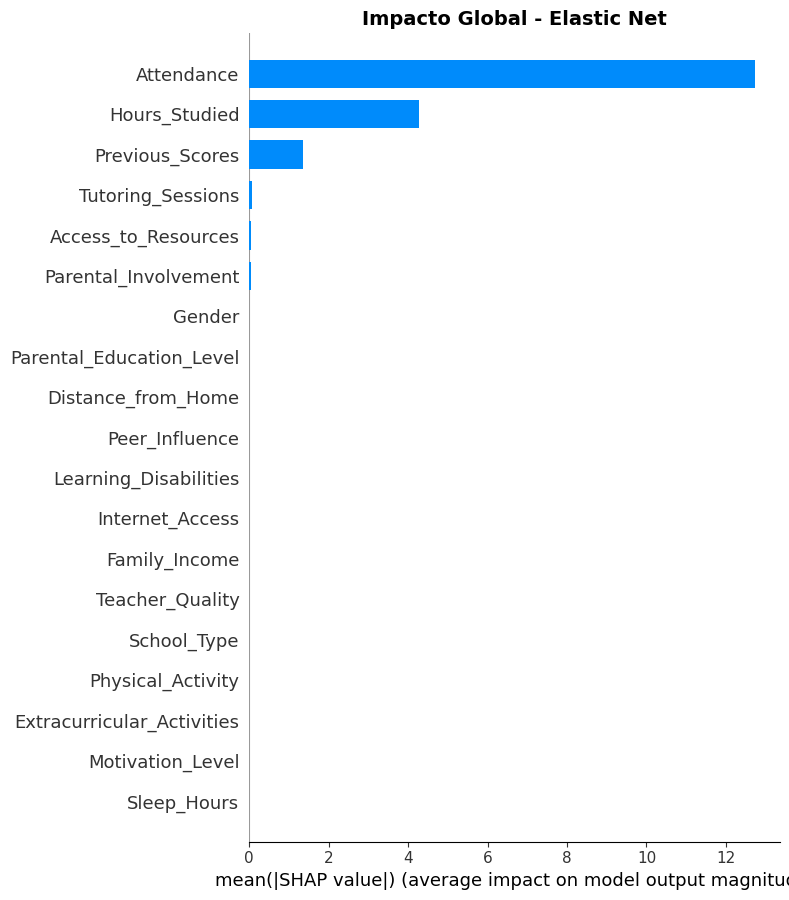

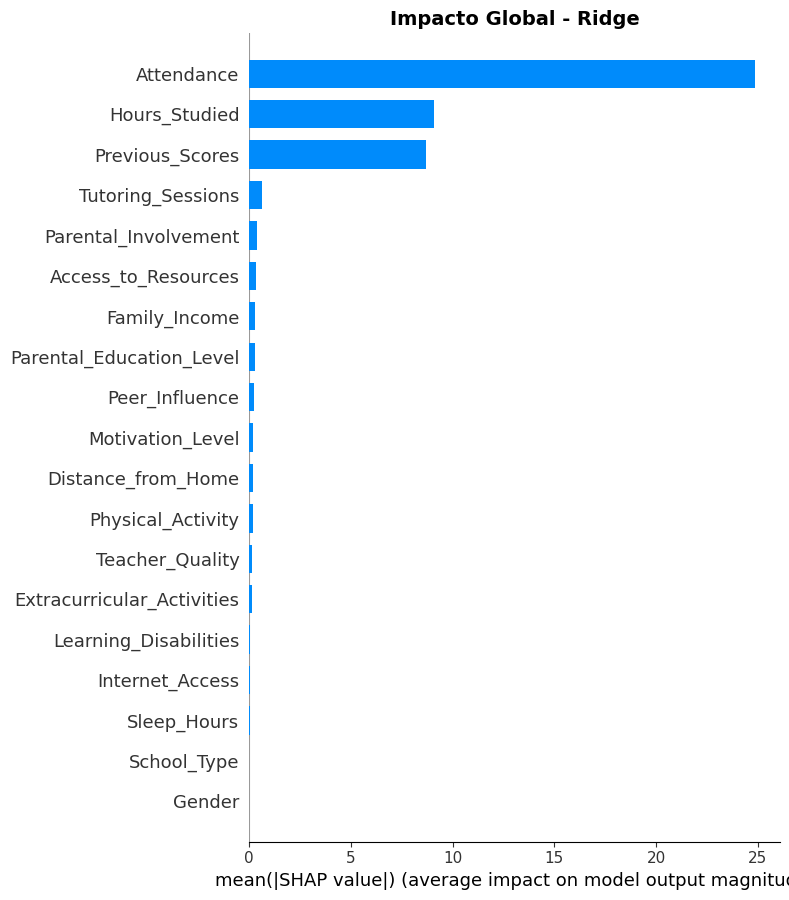

In [67]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def executar_shap_todos_modelos(modelos_dict, X_treino, X_teste, feature_names, n_amostras=100):

    resultados_shap = {}
    
    # Amostrar dados para tornar SHAP mais rápido
    if len(X_teste) > n_amostras:
        indices_amostra = np.random.choice(len(X_teste), n_amostras, replace=False)
        X_teste_shap = X_teste.iloc[indices_amostra] if hasattr(X_teste, 'iloc') else X_teste[indices_amostra]
    else:
        X_teste_shap = X_teste
    
    for nome_modelo, modelo in modelos_dict.items():     
        
            # Selecionar explainer baseado no tipo de modelo
            if 'Random Forest' in nome_modelo or 'Gradient Boosting' in nome_modelo:
                explainer = shap.TreeExplainer(modelo)
                shap_values = explainer.shap_values(X_teste_shap)
                
            elif 'KNN' in nome_modelo:
                def predict_fn(X):
                    return modelo.predict(X)
                explainer = shap.KernelExplainer(predict_fn, X_treino[:100])
                shap_values = explainer.shap_values(X_teste_shap)
                
            elif 'Elastic Net' in nome_modelo or 'Ridge' in nome_modelo:
                explainer = shap.LinearExplainer(modelo, X_treino)
                shap_values = explainer.shap_values(X_teste_shap)
                
            else:
                explainer = shap.Explainer(modelo, X_treino)
                shap_values = explainer.shap_values(X_teste_shap)
            
            # Armazenar resultados
            resultados_shap[nome_modelo] = {
                'explainer': explainer,
                'shap_values': shap_values,
                'expected_value': explainer.expected_value,
                'X_teste_shap': X_teste_shap
            }
            
    
    return resultados_shap

def plot_impacto_global(resultados_shap, feature_names, modelo_nome):

    
    if resultados_shap[modelo_nome] is None:
        return
        
    dados = resultados_shap[modelo_nome]
    shap_values = dados['shap_values']
    X_teste_shap = dados['X_teste_shap']
    
    plt.figure(figsize=(10, 6))
    shap.summary_plot(shap_values, X_teste_shap, feature_names=feature_names, 
                      plot_type="bar", show=False)
    plt.title(f'Impacto Global - {modelo_nome}', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

modelos_dict = {
    'KNN': modelo_knn,
    'Random Forest': modelo_rf, 
    'Gradient Boosting': modelo_gbr,
    'Elastic Net': modelo_en,
    'Ridge': modelo_rr
}


resultados = executar_shap_todos_modelos(modelos_dict, X_treino, X_teste, FEATURES, n_amostras=100)
for modelo in modelos_dict.keys():
    plot_impacto_global(resultados, FEATURES, modelo)

A análise SHAP revelou padrões interessantes sobre como cada modelo interpreta a importância das features para prever o desempenho acadêmico:

#### **K-Nearest Neighbors (KNN)**
O modelo KNN demonstrou um perfil de importância bastante equilibrado, com Previous_Scores emergindo como a feature mais influente, seguida por Hours_Studied e Attendance. Isso sugere que o KNN, sendo um algoritmo baseado em similaridade, dá maior peso ao histórico de desempenho do estudante. A natureza não-paramétrica do KNN parece capturar bem as relações locais entre estudantes com perfis acadêmicos semelhantes.

#### **Random Forest**
Para a Floresta Aleatória, Attendance (Presença) foi claramente a feature mais importante, com uma margem significativa sobre as demais. Hours_Studied e Previous_Scores completam o top 3, indicando que o modelo considera a consistência na frequência às aulas como o fator mais crítico para o sucesso acadêmico. A robustez do Random Forest em lidar com interações complexas entre features é evidente nessa hierarquização.

#### **Gradient Boosting**
Similar ao Random Forest, o Gradient Boosting também priorizou Attendance como a feature mais impactante, porém com uma distribuição de importância mais concentrada. Hours_Studied e Previous_Scores mantiveram suas posições como segundo e terceiro fatores mais importantes, respectivamente. A natureza sequencial do Gradient Boosting parece capturar dependências temporais e acumulativas no processo de aprendizado.

#### **Elastic Net**
O Elastic Net apresentou um padrão distinto, onde Previous_Scores assumiu a liderança, seguido por Hours_Studied e Attendance. Isso reflete a natureza linear do modelo, que atribui importância baseada em relações lineares diretas. A penalização L1 do Elastic Net resultou em uma seleção mais esparsa de features, focando nas variáveis com efeitos mais consistentes e lineares.

#### **Ridge Regression**
O modelo Ridge mostrou um comportamento similar ao Elastic Net, com Previous_Scores como feature mais importante, porém com uma distribuição de importância mais suave devido à penalização L2. Hours_Studied e Attendance mantiveram posições proeminentes, confirmando a consistência dessas três features através de diferentes paradigmas de modelagem.
Análise Comparativa e Insights Educacionais

Os resultados revelam consenso entre os modelos sobre a tríade fundamental: Attendance, Hours_Studied e Previous_Scores consistentemente aparecem como as três features mais importantes, embora em ordens variadas dependendo do algoritmo.

Implicações Educacionais:

- Presença como Fator Crítico: A importância dominante da Attendance em modelos ensemble sugere que a consistência na frequência às aulas pode ser mais crucial do que tradicionalmente se assume
- Histórico Acadêmico: O forte impacto do Previous_Scores indica que o desempenho passado é um preditor robusto do desempenho futuro
- Dedicação ao Estudo: Hours_Studied mantém sua relevância tradicional, confirmando a importância do esforço individual

É possível ainda perceber uma variação de acordo com o tipo de modelos:

- Modelos lineares (Elastic Net, Ridge) enfatizam mais o histórico acadêmico

- Modelos baseados em árvores (Random Forest, Gradient Boosting) priorizam a frequência às aulas

- O KNN mostra um equilíbrio, possivelmente capturando padrões locais mais complexos

Essas diferenças destacam a importância de considerar múltiplas perspectivas algorítmicas ao analisar fenômenos educacionais complexos, onde diferentes aspectos do processo de aprendizado podem ser capturados por diferentes abordagens de modelagem.

---
### **SELEÇÃO DE ATRIBUTOS**

Dentro do dataset, há 19 features que podem ser utilizadas pelos algoritmos para tentar prever o valor do target final. Naturalmente, é de se esperar que algumas features tenham mais importância - isto é, influenciam mais no resultado final - e outras tenham menos. Nesse sentido, reduzir o número de features retirando aquelas que não possuem tanto peso no resultado final se mostra uma ótima estratégia.

Reduzir o número de atributos tem dois motivos principais que serão cruciais para o andamento do código: melhoria do desempenho computacional e prevenção de overfitting. Muitos algoritmos - como o Random Forest, de $O(n \cdot log\,n)$ - possuem complexidade que escala muito rapidamente com o número de features. Diminuir a dimensionalidade nesse contexto aumenta a viabilidade de resolução de problemas, diminuindo tempo e o uso de recursos computacionais. Além disso, com features excessivas em relação ao número de amostras, os modelos tendem a memorizar ruídos e falsos padrões nos dados de treino ao invés de aprender relações generalizáveis.

Para esse notebook, foi escolhido o atributo `feature_importance_`, usado para *ensembles* - como a Floresta Aleatória e o Gradient Boosting - e que retorna um array onde cada elemento dele é uma feature do modelo. Ele irá dizer, em pesos, o quão importante aquela feature é para o modelo. Vale ressaltar que o ideal é fazer a seleção de atributos especificamente para o algoritmo de ML que será utilizado, no entanto, optou-se por uma simplificação desse processo ao escolher apenas um processo de seleção de atributos.

O código abaixo gerou um DataFrame de saída, com a feature e sua respectiva importância, sendo esta ordenada do maior para o menor a fim de listar os 10 atributos que mais influenciam no algoritmo.

In [12]:
importancia = RandomForestRegressor(n_estimators=100, random_state=42)
importancia.fit(X_treino_norm, y_treino)
importancia_features = pd.DataFrame({
    'feature': FEATURES,
    'importance': importancia.feature_importances_
}).sort_values('importance', ascending=False)
print(importancia_features.head(10))

                     feature  importance
1                 Attendance    0.379373
0              Hours_Studied    0.244850
6            Previous_Scores    0.086903
9          Tutoring_Sessions    0.034246
3        Access_to_Resources    0.033835
2       Parental_Involvement    0.032872
14         Physical_Activity    0.027515
5                Sleep_Hours    0.024340
10             Family_Income    0.020852
16  Parental_Education_Level    0.016734


Tendo estabelecido os atributos com maior fator de importância, colocaremos-os em uma lista para que se possa fazer o split novamente, dessa vez com menos features.

In [13]:
top_10_features = importancia_features.head(10)['feature'].tolist()

X = df[top_10_features]
y = df[TARGET].values.ravel()

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

normalizador = StandardScaler()
X_treino_norm = normalizador.fit_transform(X_treino)
X_teste_norm = normalizador.transform(X_teste)

---
### **OTIMIZAÇÃO DE HIPERPARÂMETROS**

Nessa seção, busca-se estabelecer a melhor combinação de termos para potencializar o modelo. A otimização de hiperparâmetros é basicamente a criação de funções objetivo - uma expressão matemática que representa o problema a ser otimizado - especializadas para cada algoritmo, seguindo um padrão consistente de implementação.

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
import optuna
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

Para isso, cada função específica utiliza o objeto `trial` do Optuna para definir um espaço de busca multidimensional, onde diferentes combinações de hiperparâmetros são sistematicamente exploradas e avaliadas. Cada algoritmo é colocado em uma `Pipeline`, proporcionando uma interface mais organizada para definir cada parâmetro a ser testado e avaliado pelo Optuna, que utiliza como métrica a função `cross_val_score`.

Note que essa avaliação de desempenho e seu funcionamento (usando KFold, por exemplo), será explicado na seção a seguir, sobre Avaliação Cruzada.

In [15]:
def objetivo_knn(trial):
    n_vizinhos = trial.suggest_int('n_neighbors', 1, 50)
    pesos = trial.suggest_categorical('weights', ['uniform', 'distance'])
    p = trial.suggest_int('p', 1, 2)
    
    pipeline = Pipeline([
        ('regressor', KNeighborsRegressor(
            n_neighbors=n_vizinhos,
            weights=pesos,
            p=p
        ))
    ])
    
    scores_cv = cross_val_score(pipeline, X_treino, y_treino, 
                              cv=kf, scoring='neg_root_mean_squared_error')
    return -scores_cv.mean()

In [16]:
def objetivo_rf(trial):
    n_estimadores = trial.suggest_int('n_estimators', 50, 500)
    profundidade_maxima = trial.suggest_int('max_depth', 3, 20)
    min_amostras_divisao = trial.suggest_int('min_samples_split', 2, 20)
    min_amostras_folha = trial.suggest_int('min_samples_leaf', 1, 10)
    max_caracteristicas = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    
    pipeline = Pipeline([
        ('regressor', RandomForestRegressor(
            n_estimators=n_estimadores,
            max_depth=profundidade_maxima,
            min_samples_split=min_amostras_divisao,
            min_samples_leaf=min_amostras_folha,
            max_features=max_caracteristicas,
            random_state=42
        ))
    ])

    scores_cv = cross_val_score(pipeline, X_treino, y_treino, 
                              cv=kf, scoring='neg_root_mean_squared_error')
    return -scores_cv.mean()

In [17]:
def objetivo_gb(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 1000) 
    learning_rate = trial.suggest_float('learning_rate', 0.001, 0.3, log=True) 
    max_depth = trial.suggest_int('max_depth', 2, 12)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 30)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    criterion = trial.suggest_categorical('criterion', ['friedman_mse', 'squared_error'])
    min_impurity_decrease = trial.suggest_float('min_impurity_decrease', 0.0, 0.1)
    loss = trial.suggest_categorical('loss', ['squared_error', 'absolute_error', 'huber', 'quantile'])
    
    pipeline = Pipeline([
        ('regressor', GradientBoostingRegressor(
            n_estimators=n_estimators,
            learning_rate=learning_rate,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            subsample=subsample,
            max_features=max_features,           
            criterion=criterion,                 
            min_impurity_decrease=min_impurity_decrease, 
            random_state=42,
            loss=loss
        ))
    ])

    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    scores_cv = cross_val_score(pipeline, X_treino, y_treino, 
                              cv=kf, scoring='neg_root_mean_squared_error')
    return -scores_cv.mean()

In [18]:
def objetivo_elasticnet(trial):
    alpha = trial.suggest_float('alpha', 0.001, 10.0, log=True)
    razao_l1 = trial.suggest_float('l1_ratio', 0.0, 1.0)
    
    pipeline = Pipeline([
        ('regressor', ElasticNet(
            alpha=alpha,
            l1_ratio=razao_l1,
            random_state=42,
            max_iter=10000
        ))
    ])

    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    scores_cv = cross_val_score(pipeline, X_treino, y_treino, 
                              cv=kf, scoring='neg_root_mean_squared_error')
    return -scores_cv.mean()

In [19]:
def objetivo_ridge(trial):
    alpha = trial.suggest_float('alpha', 0.001, 10.0, log=True)
    solver = trial.suggest_categorical('solver', ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'])
    tol = trial.suggest_float('tol', 1e-5, 1e-2, log=True)
    fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])
    max_iter = trial.suggest_categorical('max_iter', [None, 1000, 10000])
    
    pipeline = Pipeline([
        ('regressor', Ridge(
            alpha=alpha,
            solver=solver,
            max_iter=max_iter,      
            random_state=42
        ))
    ])
    
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    scores_cv = cross_val_score(pipeline, X_treino, y_treino, 
                              cv=kf, scoring='neg_root_mean_squared_error')
    return -scores_cv.mean()

Após a criação das funções, deve-se iniciar estudos individuais para cada algoritmo por meio do atributo `create_study`, buscando maximizar a pontuação do modelo, a fim de buscar um modelo mais robusto. Cada estudo executa múltiplos trials, onde cada trial representa uma combinação específica de hiperparâmetros. Ao final do processo, os melhores parâmetros são identificados e serão utilizados para treinar o modelo final.
Para cada estido, usamos a função `.enqueue_trial` para garantir que um dos testes seja realizado com os hiperparâmetros determinados previamente.

In [20]:
print("Iniciando a otimização do modelo KNN...")
estudo_knn = optuna.create_study(direction='minimize')
estudo_knn.enqueue_trial({
    "n_neighbors": 5,
    "weights": "uniform", 
    "p": 2
})
estudo_knn.optimize(objetivo_knn, n_trials=100)

print("Iniciando a otimização do modelo Floresta Aleatória...")
estudo_rf = optuna.create_study(direction='minimize')
estudo_rf.enqueue_trial({
    "n_estimators": 100,
    "max_depth": 10, 
    "min_samples_split": 2,
    "min_samples_leaf": 1,
    "max_features": None 
})
estudo_rf.optimize(objetivo_rf, n_trials=100)

print("Iniciando a otimização do modelo Gradient Boosting...")
estudo_gb = optuna.create_study(direction='minimize')
estudo_gb.enqueue_trial({
    "n_estimators": 100,
    "learning_rate": 0.1,
    "max_depth": 3,
    "min_samples_split": 2,
    "min_samples_leaf": 1,
    "subsample": 1.0,
    "max_features": None,
    "criterion": "friedman_mse",  
    "min_impurity_decrease": 0.0,
    "random_state": 42
    
})
estudo_gb.optimize(objetivo_gb, n_trials=100)

print("Iniciando a otimização do modelo Elastic Net...")
estudo_en = optuna.create_study(direction='minimize')
estudo_en.enqueue_trial({
    "alpha": 1.0,
    "l1_ratio": 0.5
})
estudo_en.optimize(objetivo_elasticnet, n_trials=100)

print("Iniciando a otimização do modelo Ridge Regression...")
estudo_ridge = optuna.create_study(direction='minimize')
estudo_ridge.enqueue_trial({
    "alpha": 1.0,
    "solver": "auto", 
    "tol": 0.001,
    "fit_intercept": True,
    "copy_X": True,          
    "max_iter": None,          
    "positive": False,
    "random_state": 42
})
estudo_ridge.optimize(objetivo_ridge, n_trials=100)

[I 2025-11-04 10:58:58,985] A new study created in memory with name: no-name-81cb8281-3af3-49fb-a563-36a995e33fde
[I 2025-11-04 10:58:59,063] Trial 0 finished with value: 2.7001363523215827 and parameters: {'n_neighbors': 5, 'weights': 'uniform', 'p': 2}. Best is trial 0 with value: 2.7001363523215827.
[I 2025-11-04 10:58:59,147] Trial 1 finished with value: 2.6644012099736827 and parameters: {'n_neighbors': 6, 'weights': 'uniform', 'p': 2}. Best is trial 1 with value: 2.6644012099736827.


Iniciando a otimização do modelo KNN...


[I 2025-11-04 10:58:59,270] Trial 2 finished with value: 2.5383270171500207 and parameters: {'n_neighbors': 14, 'weights': 'uniform', 'p': 1}. Best is trial 2 with value: 2.5383270171500207.
[I 2025-11-04 10:58:59,392] Trial 3 finished with value: 2.5728494932356356 and parameters: {'n_neighbors': 9, 'weights': 'uniform', 'p': 1}. Best is trial 2 with value: 2.5383270171500207.
[I 2025-11-04 10:58:59,553] Trial 4 finished with value: 2.523413296187019 and parameters: {'n_neighbors': 44, 'weights': 'distance', 'p': 1}. Best is trial 4 with value: 2.523413296187019.
[I 2025-11-04 10:58:59,712] Trial 5 finished with value: 2.5315921768384295 and parameters: {'n_neighbors': 41, 'weights': 'uniform', 'p': 1}. Best is trial 4 with value: 2.523413296187019.
[I 2025-11-04 10:58:59,807] Trial 6 finished with value: 2.558733484053064 and parameters: {'n_neighbors': 36, 'weights': 'distance', 'p': 2}. Best is trial 4 with value: 2.523413296187019.
[I 2025-11-04 10:58:59,965] Trial 7 finished with

Iniciando a otimização do modelo Floresta Aleatória...


[I 2025-11-04 10:59:16,394] Trial 0 finished with value: 2.428565565763111 and parameters: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None}. Best is trial 0 with value: 2.428565565763111.
[I 2025-11-04 10:59:22,447] Trial 1 finished with value: 2.3831281733557588 and parameters: {'n_estimators': 451, 'max_depth': 19, 'min_samples_split': 11, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 1 with value: 2.3831281733557588.
[I 2025-11-04 10:59:23,330] Trial 2 finished with value: 2.422160674267949 and parameters: {'n_estimators': 79, 'max_depth': 19, 'min_samples_split': 3, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 1 with value: 2.3831281733557588.
[I 2025-11-04 10:59:26,615] Trial 3 finished with value: 2.806740892425591 and parameters: {'n_estimators': 271, 'max_depth': 3, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': None}. Best is trial 1 with value: 2.3831281733557588.
[I 2

Iniciando a otimização do modelo Gradient Boosting...


[I 2025-11-04 11:09:42,712] Trial 0 finished with value: 2.2942894901405424 and parameters: {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 1, 'subsample': 1.0, 'max_features': None, 'criterion': 'friedman_mse', 'min_impurity_decrease': 0.0, 'loss': 'squared_error'}. Best is trial 0 with value: 2.2942894901405424.
[I 2025-11-04 11:10:17,935] Trial 1 finished with value: 2.284516663839712 and parameters: {'n_estimators': 274, 'learning_rate': 0.0629020930886357, 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 2, 'subsample': 0.5682237326724633, 'max_features': 'log2', 'criterion': 'friedman_mse', 'min_impurity_decrease': 0.0007819459985287214, 'loss': 'huber'}. Best is trial 1 with value: 2.284516663839712.
[I 2025-11-04 11:10:20,131] Trial 2 finished with value: 3.2734657572218366 and parameters: {'n_estimators': 167, 'learning_rate': 0.0023949027248663267, 'max_depth': 5, 'min_samples_split': 30, 'min_samples_leaf': 1

Iniciando a otimização do modelo Elastic Net...


[I 2025-11-04 11:33:09,266] Trial 10 finished with value: 2.210254522376828 and parameters: {'alpha': 0.0010169905864313251, 'l1_ratio': 0.3187821581614465}. Best is trial 10 with value: 2.210254522376828.
[I 2025-11-04 11:33:09,285] Trial 11 finished with value: 2.210254613416177 and parameters: {'alpha': 0.0011858689606844403, 'l1_ratio': 0.3007087703065182}. Best is trial 10 with value: 2.210254522376828.
[I 2025-11-04 11:33:09,305] Trial 12 finished with value: 2.210255033033062 and parameters: {'alpha': 0.0011115343493623463, 'l1_ratio': 0.2817583718732101}. Best is trial 10 with value: 2.210254522376828.
[I 2025-11-04 11:33:09,332] Trial 13 finished with value: 2.210253784299039 and parameters: {'alpha': 0.001236545192900989, 'l1_ratio': 0.3404012404513443}. Best is trial 13 with value: 2.210253784299039.
[I 2025-11-04 11:33:09,356] Trial 14 finished with value: 2.2102865962769793 and parameters: {'alpha': 0.004984692303000807, 'l1_ratio': 0.08568487306175587}. Best is trial 13 w

Iniciando a otimização do modelo Ridge Regression...


[I 2025-11-04 11:33:11,381] Trial 4 finished with value: 2.210263759177494 and parameters: {'alpha': 0.005114422403561776, 'solver': 'sag', 'tol': 0.0005117623181011983, 'fit_intercept': True, 'max_iter': 10000}. Best is trial 2 with value: 2.2102475246226927.
[I 2025-11-04 11:33:11,397] Trial 5 finished with value: 2.2102643605670087 and parameters: {'alpha': 8.264174933464526, 'solver': 'auto', 'tol': 0.0073048517466399385, 'fit_intercept': False, 'max_iter': 1000}. Best is trial 2 with value: 2.2102475246226927.
[I 2025-11-04 11:33:11,415] Trial 6 finished with value: 2.210261379922623 and parameters: {'alpha': 5.852921644091756, 'solver': 'cholesky', 'tol': 0.0005314060833199497, 'fit_intercept': False, 'max_iter': 10000}. Best is trial 2 with value: 2.2102475246226927.
[I 2025-11-04 11:33:11,435] Trial 7 finished with value: 2.2102501957060303 and parameters: {'alpha': 0.13810020252883556, 'solver': 'lsqr', 'tol': 0.008352736131999652, 'fit_intercept': True, 'max_iter': 10000}. Be

Terminado esse processo, obtém-se os melhores parâmetros com o atributo `best_params` e declara-se o trial com o melhor desempenho na otimização. Com isso, novamente cria-se pipelines de cada algoritmo, definindo o método de regressão juntamente de uma expressão cujo objetivo é iterar sobre todos os pares "chave-valor" do dicionário de melhores parâmetros; filtrá-lo, removendo qualquer chave que inicie com `regressor__`, que causa problemas posteriomente se não for retirado; e, por fim, desempacotar esse dicionário usando o `**` no início da expressão para passar os parâmetros para o construtor do regressor.

In [27]:
melhores_params_knn = estudo_knn.best_params
melhores_params_rf = estudo_rf.best_params
melhores_params_gb = estudo_gb.best_params
melhores_params_en = estudo_en.best_params
melhores_params_ridge = estudo_ridge.best_params

pipeline_knn = Pipeline([
    ('regressor', KNeighborsRegressor(**{k: v for k, v in melhores_params_knn.items() if k != 'regressor__'}))
])

pipeline_rf = Pipeline([
    ('regressor', RandomForestRegressor(**{k: v for k, v in melhores_params_rf.items() if k != 'regressor__'}))
])

pipeline_gb = Pipeline([
    ('regressor', GradientBoostingRegressor(**{k: v for k, v in melhores_params_gb.items() if k != 'regressor__'}, random_state=42))
])

pipeline_en = Pipeline([
    ('regressor', ElasticNet(**{k: v for k, v in melhores_params_en.items() if k != 'regressor__'}, random_state=42, max_iter=10000))
])

pipeline_ridge = Pipeline([
    ('regressor', Ridge(**{k: v for k, v in melhores_params_ridge.items() if k != 'regressor__'}, random_state=42))
])

---
### **MODELOS OTIMIZADOS COM ANÁLISE DE DESEMPENHO POR VALIDAÇÃO CRUZADA**

Nesse tópico, foi feita a última verificação de desempenho dos cinco modelos escolhidos. Para tal, selecionou-se a validação cruzada, essencial para obter uma avaliação mais confiável do desempenho dos modelos. Diferente de uma simples divisão treino/teste - que por obra do acaso pode ser influenciada por uma divisão específica dos dados - a validação cruzada usa múltiplas divisões, onde cada parte dos dados serve tanto para treino quanto para teste em rodadas alternadas, os "folds".

Isso fornece uma estimativa mais robusta da performance real do modelo, permitindo identificar melhor seu verdadeiro poder de generalização para novos dados. Ademais, também revela a consistência do modelo através da variação entre as rodadas e maximiza o uso dos dados disponíveis, especialmente importante em conjuntos menores.

In [28]:
from sklearn.model_selection import KFold

Para aplicar a validação cruzada, primeiro cria-se um dicionário que mapeia nomes às pipelines previamente configuradas com seus melhores parâmetros. Posteriormente, define-se o método de validação cruzada, que aqui é o `KFold`, e a quantidade de folds desejados, que tradicionalmente é 5 por ser um equilíbrio entre robustez e custo computacional.

Após esses processos, declara-se um loop onde para cada modelo no dicionário de pipelines, onde executa-se a validação cruzada calculando o MSE negativo que é convertido para MSE positivo e partir dele, calcula-se o RMSE. Depois é feito o treinamento, o teste e calcula-se o RMSE no conjunto de teste. Para finalizar, os resultados são armazenados e imprimidos para cada algoritmo testado, mostrando tanto a performance na validação cruzada, quanto no teste.

In [34]:
pipelines = {
    'KNN': pipeline_knn,
    'Random Forest': pipeline_rf,
    'Gradient Boosting': pipeline_gb,
    'Elastic Net': pipeline_en,
    'Ridge Regression': pipeline_ridge
}

# Dicionário com os melhores parâmetros de cada estudo
melhores_parametros = {
    'KNN': estudo_knn.best_params,
    'Random Forest': estudo_rf.best_params,
    'Gradient Boosting': estudo_gb.best_params,
    'Elastic Net': estudo_en.best_params,
    'Ridge Regression': estudo_ridge.best_params
}

resultados = {}
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for nome, pipeline in pipelines.items():
    scores_cv = cross_val_score(pipeline, X_treino, y_treino, 
                              cv=kf, scoring='neg_root_mean_squared_error')
    scores_rmse = -scores_cv
    
    pipeline.fit(X_treino, y_treino)
    y_previsto = pipeline.predict(X_teste)
    rmse_teste = root_mean_squared_error(y_teste, y_previsto)
    
    resultados[nome] = {
        'RMSE_CV_media': scores_rmse.mean(),
        'RMSE_CV_desvio': scores_rmse.std(),
        'RMSE_Teste': rmse_teste,
        'Melhores_Parametros': melhores_parametros[nome]
    }
    
    print(f"{nome}:")
    print(f"RMSE Validação Cruzada: {scores_rmse.mean():.4f} (±{scores_rmse.std():.4f})")
    print(f"RMSE Teste: {rmse_teste:.4f}")
    print(f"Melhores Parâmetros: {melhores_parametros[nome]}")

KNN:
RMSE Validação Cruzada: 2.5145 (±0.3128)
RMSE Teste: 2.4679
Melhores Parâmetros: {'n_neighbors': 28, 'weights': 'distance', 'p': 1}
Random Forest:
RMSE Validação Cruzada: 2.3546 (±0.3274)
RMSE Teste: 2.3259
Melhores Parâmetros: {'n_estimators': 411, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}
Gradient Boosting:
RMSE Validação Cruzada: 2.2202 (±0.3729)
RMSE Teste: 2.2102
Melhores Parâmetros: {'n_estimators': 933, 'learning_rate': 0.056992093498910254, 'max_depth': 2, 'min_samples_split': 14, 'min_samples_leaf': 4, 'subsample': 0.7648363686916899, 'max_features': 'log2', 'criterion': 'friedman_mse', 'min_impurity_decrease': 0.044665283260653554, 'loss': 'huber'}
Elastic Net:
RMSE Validação Cruzada: 2.2102 (±0.3701)
RMSE Teste: 2.1929
Melhores Parâmetros: {'alpha': 0.0039259117073194095, 'l1_ratio': 0.9998290286369553}
Ridge Regression:
RMSE Validação Cruzada: 2.2126 (±0.3697)
RMSE Teste: 2.1960
Melhores Parâmetros: {'alpha': 0.001797662783

---
## **CONCLUSÃO**

Este trabalho demonstrou com sucesso a aplicação de técnicas avançadas de machine learning para prever e compreender o desempenho acadêmico de estudantes. Através de uma abordagem abrangente que incluiu pré-processamento cuidadoso, seleção de features, otimização sistemática de hiperparâmetros e validação rigorosa, desenvolvemos modelos robustos capazes de prever notas de exames com erro médio significativamente inferior à baseline estabelecida.

Os resultados revelaram que modelos regularizados como Elastic Net e Ridge Regression alcançaram o melhor desempenho preditivo, seguidos pelo Gradient Boosting, Random Forest e KNN. Esta hierarquia de performance sugere que, para este problema específico, modelos com regularização que lidam bem com multicolinearidade e overfitting superaram abordagens mais complexas.

A análise SHAP proporcionou insights valiosos sobre a lógica subjacente de cada modelo, identificando consistentemente Attendance (presença), Hours_Studied (horas de estudo) e Previous_Scores (notas anteriores) como os três fatores mais influentes no desempenho acadêmico. Esta descoberta tem implicações práticas significativas para educadores e gestores, sugerindo que intervenções focadas em melhorar a frequência às aulas e promover hábitos de estudo consistentes podem ter o maior impacto no sucesso acadêmico.

O trabalho também destacou a importância da seleção de atributos, onde a redução de 19 para 10 features não apenas melhorou a eficiência computacional, mas também potencialmente a generalização dos modelos através da redução de overfitting.

Em resumo, este projeto não apenas desenvolveu modelos preditivos eficazes, mas também contribuiu para uma compreensão mais profunda dos fatores que impulsionam o sucesso acadêmico, oferecendo ferramentas e insights que podem informar políticas educacionais e práticas pedagógicas baseadas em evidências.

---
## **REFERÊNCIAS**

- **KAGGLE.** *Student Performance Factors Dataset.* Disponível em: [https://www.kaggle.com/datasets](https://www.kaggle.com/datasets).  .

- **ALI, N. et al.** *Factors Affecting Students’ Performance: A Case of Students of Business Studies Faculty, King Abdulaziz University.*  
  *Research Journal of International Studies*, n. 12, p. 1–10, 2013.  
  Disponível em: (https://d1wqtxts1xzle7.cloudfront.net/56029351/student_performance-libre.pdf?1520838052=&response-content-disposition=inline%3B+filename%3DFACTORS_AFFECTING_STUDENTS_PERFORMANCE_A.pdf&Expires=1762262472&Signature=EO7IVnM7IJzBVzdc~Tbm9dVFIa7t8gXxGqD1VkN0T9Anc7c5HYW9D8clsvk~w9l81HII8RRv3nkI33kEBQinhUsiB770DB8D4GYy8Kyw2diNKbl1Yp9y5sfHnXgJPmDFb74OHOjbm0y95dEv4WSSIDNbATByKkkb4GGw7qu1kv1~yn7DYlPDXqJdnwDv-nawm68fuJNZjemduXG1nhZ1g1qXwWhmOjE3zv8zW8n5Qbpi~3zkSUwNr90OFDcSOXwKqCPYNDHoUYH7Sj4uWPHl1tWGCvBPkHEggSHDI1935aok4tg7XehcDcOh76P276qykZ-55TaMtpOHBSIqELt-JA__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA).  

- **SCIKIT-LEARN Developers.** *Scikit-learn Documentation.*  
  Disponível em: [https://scikit-learn.org/stable/documentation.html](https://scikit-learn.org/stable/documentation.html).  

- Materiais de aula do professor Daniel R. Cassar
